<h1><b>DATA-X - MUSHROOM CLASSIFICATION<h1>

**Author: Petr Nguyen**

***Collaborators: Lukas Dolezal, Patrik Korsch, Roman Pavlata, Daniel Bihany***

In [1]:
import warnings
warnings.filterwarnings("ignore")

<i>Importing auxiliary functions from our created package to deal with the tasks which are specific for this project only. <i>

In [2]:
import src_PN.aux_functions as aux

<i>Setting the displaying options.<i>

In [3]:
aux.pd.set_option('display.max_columns', 50)
aux.pd.set_option('display.max_colwidth', 400)
aux.pd.set_option('display.float_format', lambda x: '%.5f' % x)

<i>Explicitly setting a random seed to preserve the reproducibility of this script.<i> (seed = 469)

In [4]:
seed = 469

<h2><b>Data reading and understanding<b><h2>

In [5]:
dataset = aux.reading_data()

<i>All the variables seem to be categorical. The data has 8131 observations and 23 variables (1 target variable and 22 features).<i>

In [6]:
dataset

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8126,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8127,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8128,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8129,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


<i>No missing values have been observed. However, it is needed to explore the variables' values/categories.

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8131 entries, 0 to 8130
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8131 non-null   object
 1   cap-shape                 8131 non-null   object
 2   cap-surface               8131 non-null   object
 3   cap-color                 8131 non-null   object
 4   bruises                   8131 non-null   object
 5   odor                      8131 non-null   object
 6   gill-attachment           8131 non-null   object
 7   gill-spacing              8131 non-null   object
 8   gill-size                 8131 non-null   object
 9   gill-color                8131 non-null   object
 10  stalk-shape               8131 non-null   object
 11  stalk-root                8131 non-null   object
 12  stalk-surface-above-ring  8131 non-null   object
 13  stalk-surface-below-ring  8131 non-null   object
 14  stalk-color-above-ring  

<i>As can be seen, there are 6 duplicates, therefore these rows will be dropped from the dataset. With omitted duplicates we end up with 8125 observations.<i>

In [8]:
dataset = aux.removing_duplicates(dataset)

6 duplicated rows.


In [9]:
dataset

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8126,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8127,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8128,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8129,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


<i>Unique categories per variable.<i>

In [10]:
for col in dataset.columns:
    print(col+':', list(dataset[col].unique()))

class: ['p', 'e']
cap-shape: ['x', 'b', 's', 'f', 'k', 'c']
cap-surface: ['s', 'y', 'f', 'g']
cap-color: ['n', 'y', 'w', 'g', 'e', 'p', 'b', 'u', 'c', 'r']
bruises: ['t', 'f']
odor: ['p', 'a', 'l', 'n', 'f', 'c', 'y', 's', 'm']
gill-attachment: ['f', 'a']
gill-spacing: ['c', 'w']
gill-size: ['n', 'b']
gill-color: ['k', 'n', 'g', 'p', 'w', 'h', 'u', 'e', 'b', 'r', 'y', 'o']
stalk-shape: ['e', 't', 'Ee']
stalk-root: ['e', 'c', 'b', 'r', '?']
stalk-surface-above-ring: ['s', 'f', 'k', 'y']
stalk-surface-below-ring: ['s', 'f', 'y', 'k']
stalk-color-above-ring: ['w', 'g', 'p', 'n', 'b', 'e', 'o', 'c', 'y']
stalk-color-below-ring: ['w', 'p', 'g', 'b', 'n', 'e', 'y', 'o', 'c']
veil-type: ['p']
veil-color: ['w', 'n', 'o', 'y']
ring-number: ['o', 't', 'n']
ring-type: ['p', 'e', 'l', 'f', 'n']
spore-print-color: ['k', 'n', 'u', 'h', 'w', 'r', 'o', 'y', 'b']
population: ['s', 'n', 'a', 'v', 'y', 'c']
habitat: ['u', 'g', 'm', 'd', 'p', 'w', 'l']


<i>As can be seen in the two cells below, the feature "stalk-shape" should have only 2 categories ("e" and "t", "enlarging" and "tapering" respectively), but in the raw dataset, there are 3 categories, including category "Ee".

After following considerations, we deem reasonable to remove such row containing given category "Ee" which is clearly a noise in order to avoid any bias.

Nevertheless, we deem it should not impact the model so much since this issue is pertaining to the one single observation out of whole dataset. <i>

In [11]:
aux.pd.crosstab(dataset['stalk-shape'], dataset['class'])

class,e,p
stalk-shape,,
Ee,0,1
e,1616,1900
t,2592,2016


<i>Also, we convert the data which are the object types into category types for faster computations. After removing such row, we end up with a data of 8124 instances.<i>

In [12]:
dataset = dataset[dataset["stalk-shape"] != "Ee"]
dataset = dataset.astype('category')

In [13]:
dataset

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8126,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8127,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8128,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8129,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


<i>Reading the categories' names-categories names' initials pairs with latter remapping the raw dataset.<i>

In [14]:
#Once the GitHub repository's visibility will be changed from private to public, the file path won't be needed anymore.
category_names = aux.reading_cats_names_kaggle()

In [15]:
category_names

,Initials,Full name
class,e,edible
class,p,poisonous
cap-shape,b,bell
cap-shape,c,conical
cap-shape,x,convex
...,...,...
habitat,m,meadows
habitat,p,paths
habitat,u,urban
habitat,w,waste


<i>Remapping the categories' names for better readability of exploration and visualization.<i>

In [16]:
data_mapped = aux.mapping_cat_names(dataset, category_names)

In [17]:
data_mapped

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,tapering,equal,smooth,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8126,edible,knobbed,smooth,brown,no,none,attached,close,broad,yellow,enlarging,missing,smooth,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8127,edible,convex,smooth,brown,no,none,attached,close,broad,yellow,enlarging,missing,smooth,smooth,orange,orange,partial,brown,one,pendant,buff,several,leaves
8128,edible,flat,smooth,brown,no,none,attached,close,broad,brown,enlarging,missing,smooth,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8129,poisonous,knobbed,scaly,brown,no,fishy,free,close,narrow,buff,tapering,missing,smooth,silky,white,white,partial,white,one,evanescent,white,several,leaves


<i>Descriptive statistics - the target variable is dichotomous since it has 2 classes - edible and poisonous.<i>

In [18]:
data_mapped.describe().transpose()

,count,unique,top,freq
class,8124,2,edible,4208
cap-shape,8124,6,convex,3656
cap-surface,8124,4,scaly,3244
cap-color,8124,10,brown,2284
bruises,8124,2,no,4748
odor,8124,9,none,3528
gill-attachment,8124,2,free,7914
gill-spacing,8124,2,close,6812
gill-size,8124,2,broad,5612
gill-color,8124,12,buff,1728


<h2><b>Data visualization<h2>

<i>Distribution of the target variable - the distribution seems almost uniform, therefore no under/oversampling is needed. Although, the edible mushrooms are the majority category since this category has 51.8% proportion on the whole target variable.<i>

In [19]:
data_mapped['class'].value_counts(normalize = True)

edible      0.51797
poisonous   0.48203
Name: class, dtype: float64

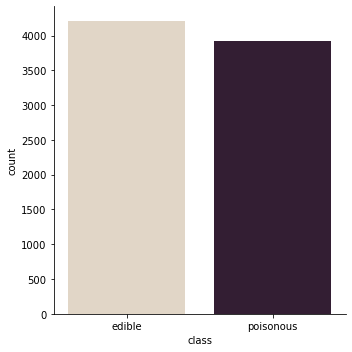

In [20]:
aux.sns.catplot(data = data_mapped, x = "class", kind = "count", palette = "ch:.25")
aux.plt.show()

<i>Pertaining to the feature "stalk-root", there is a category Missing. One could say that given mushroom does not have any stalk root. Contradictory, one could say that the missing could NA. Nevertheless, we will treat missing as a single category, therefore no imputation will take a place.<i>

<i>Feature "veil-type" does have only one category. If we convert this variable to numeric values, it would have zero variance and therefore no predictive power with respect to the target variable.<i>

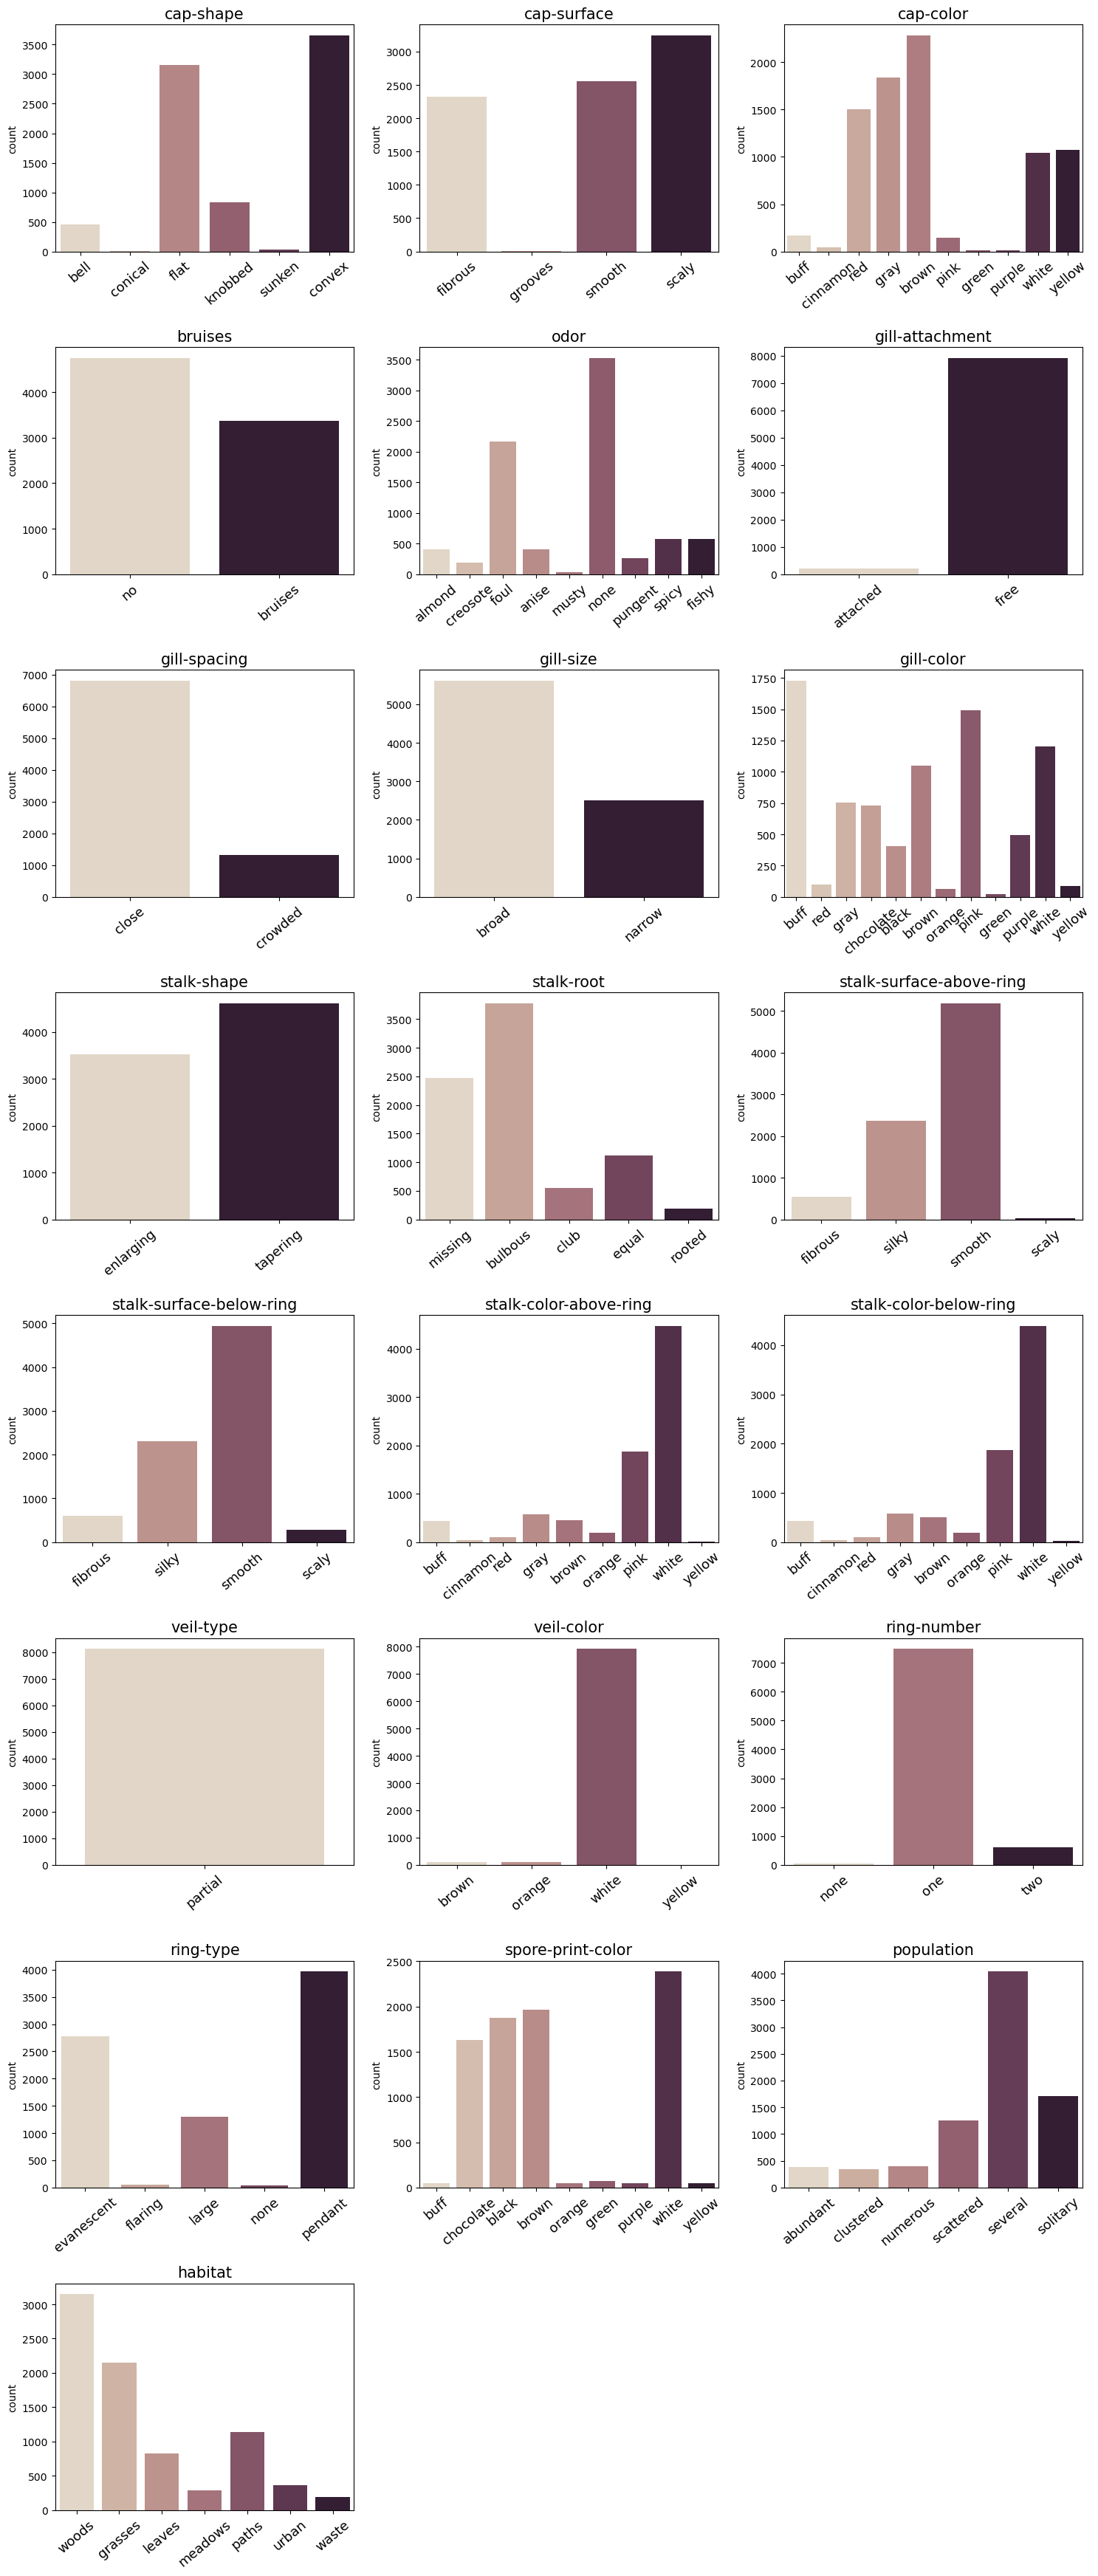

In [21]:
aux.feat_dist_plot(data_mapped, conditional = False)

<i>Feature distribution conditional on the target classes.<i>

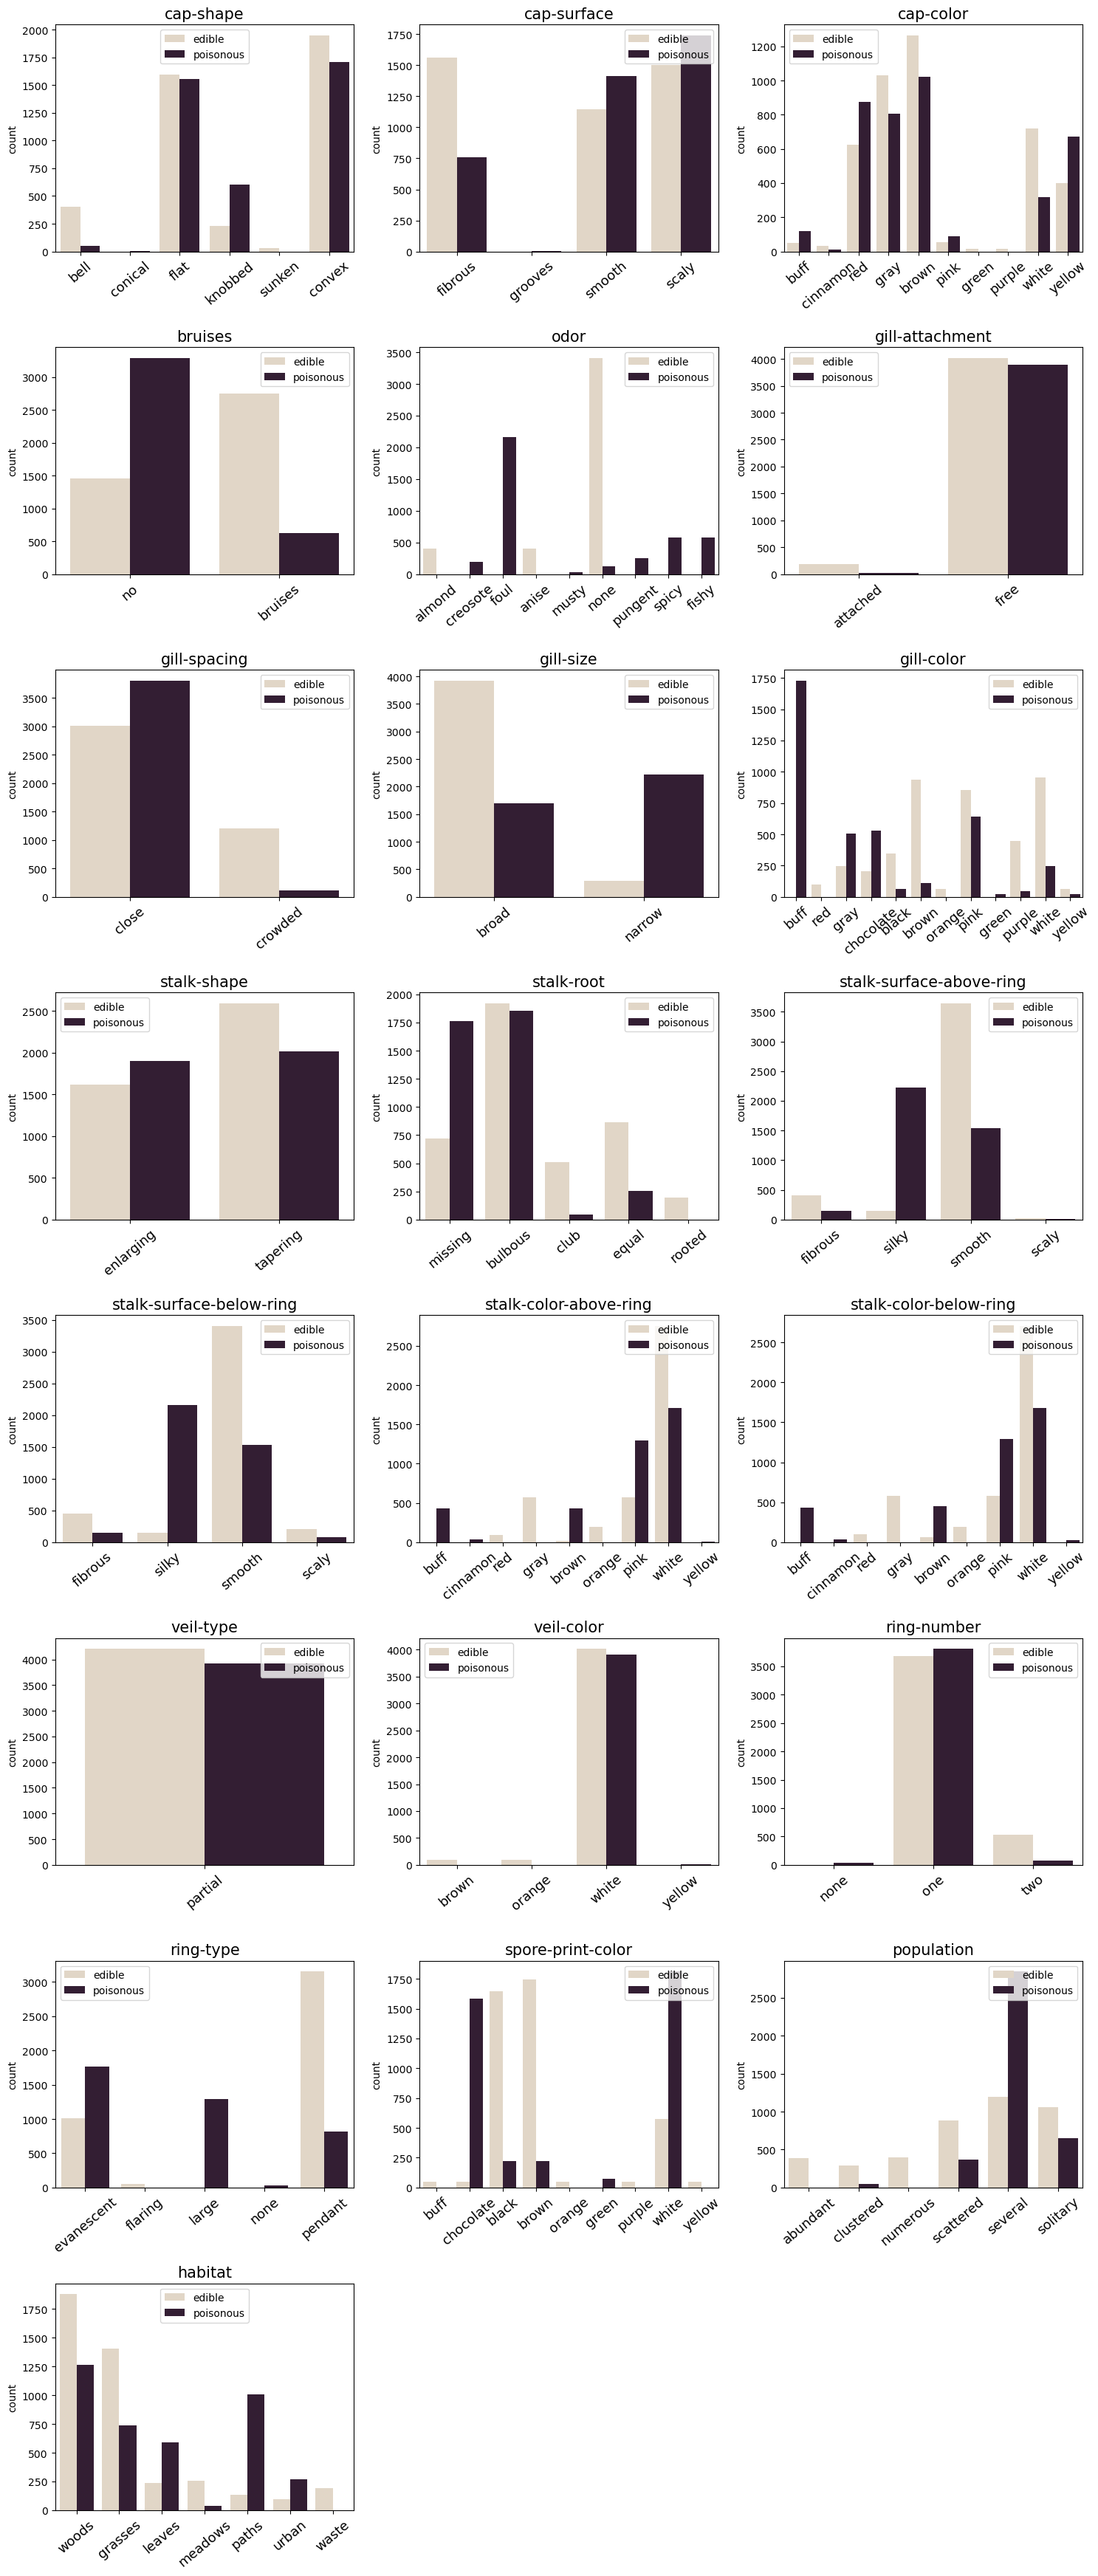

In [22]:
aux.feat_dist_plot(data_mapped, conditional = True)

<h3><b>Dependency Analysis - Chi-squared Hypothesis testing<h3>

<i>We perform chi-squared hypothesis testing in the relation of 2 categorical variables.
- particularly, we test a relationship between a feature and the target variable (class).
- We perform testing on 5% significance level.
- As can be seen below, we choose 5 features which seem to be the most interesting (considering the previous analysis using conditional distributions) with respect to the target variable.
- As expected, for all the 5 chosen features, we fail the reject the null hypothesis, thus there is a dependence between the feature(s) and the target variable.

In [23]:
aux.dependency_analysis(data_mapped, 'odor')

The p-value is 0.0.
Result: We reject the null hypothesis: There is a relationship between odor and class, thus they are dependent.


class,edible,poisonous
odor,,
almond,400,0
creosote,0,192
foul,0,2160
anise,400,0
musty,0,36
none,3408,120
pungent,0,256
spicy,0,576
fishy,0,576


In [24]:
aux.dependency_analysis(data_mapped, 'bruises')

The p-value is 0.0.
Result: We reject the null hypothesis: There is a relationship between bruises and class, thus they are dependent.


class,edible,poisonous
bruises,,
no,1456,3292
bruises,2752,624


In [25]:
aux.dependency_analysis(data_mapped, 'gill-size')

The p-value is 0.0.
Result: We reject the null hypothesis: There is a relationship between gill-size and class, thus they are dependent.


class,edible,poisonous
gill-size,,
broad,3920,1692
narrow,288,2224


In [26]:
aux.dependency_analysis(data_mapped, 'ring-type')

The p-value is 0.0.
Result: We reject the null hypothesis: There is a relationship between ring-type and class, thus they are dependent.


class,edible,poisonous
ring-type,,
evanescent,1008,1768
flaring,48,0
large,0,1296
none,0,36
pendant,3152,816


In [27]:
aux.dependency_analysis(data_mapped, 'habitat')

The p-value is 0.0.
Result: We reject the null hypothesis: There is a relationship between habitat and class, thus they are dependent.


class,edible,poisonous
habitat,,
woods,1880,1268
grasses,1408,740
leaves,240,592
meadows,256,36
paths,136,1008
urban,96,272
waste,192,0


<h2><b>Data split<h2>

<i>Stratified split into training (70%), validation (15%) and test (15%) set.<i>

In [28]:
X_train, X_valid, X_test, y_train, y_valid, y_test = aux.data_split(data_mapped, seed, valid = True)

<h2><b>Binning and Weight-of-Evidence Transformation<h2>

<i>Fitting the Binning Process on training set, optimally binning the categories, transforming them on WoE values, which is then used to transform either training, validation and test set.<i>
- Also, we export the Binning Process object which can be used for transformation of set of the same features on which the Binning Process was fitted on the training set.

In [29]:
_, X_test_binned, __ = aux.binning(X_train, y_train, X_test,
                                list(X_train.columns))

X_train_binned, X_valid_binned, woe_bins = aux.binning(X_train, y_train, X_valid,   
                                        list(X_train.columns), save_binning_woe_model = True)

<i>Loading the Binning Process object which we have exported in the previous step.<i>

In [30]:
binning_woe_model_loaded = aux.pickle.load(open('binning_woe_model.h5', 'rb'))

<i>Check whether the data with binned categories transformed into WoE are the same as the data with binned categories transformed into WoE by the loaded model.<i>

In [31]:
for orig, loaded in zip ([X_train_binned, X_valid_binned, X_test_binned], [X_train, X_valid, X_test]):
    loaded_df = binning_woe_model_loaded.transform(loaded)
    loaded_df.index = orig.index
    assert all(orig == loaded_df)

<i>As can be seen, training, validation and test set are transformed and transformed into a numerical form according to the fit on training set (no data leakage should not have happened).<i>

In [32]:
X_train_binned

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
5434,-0.02148,-0.65341,0.66650,0.90014,0.00000,0.00000,0.30470,-0.75995,2.53433,0.23601,0.03272,2.77149,2.73728,0.87666,2.75086,0.00000,0.00000,0.11876,1.22581,3.45518,-0.40395,2.06307
555,-0.02148,-0.65341,0.66650,-1.42948,0.00000,0.00000,-2.37678,2.08184,-0.20237,-0.18294,0.03272,-0.80174,-0.72945,-0.68760,-0.68946,0.00000,0.00000,0.11876,-1.31765,-2.12200,0.92477,-0.35442
6656,0.01613,0.20999,-0.14407,0.90014,0.00000,0.00000,0.30470,2.08184,2.53433,-0.18294,0.93338,2.77149,-0.72945,-0.68760,-0.68946,0.00000,0.00000,0.11876,1.22581,1.18912,0.92477,1.03671
6896,0.01613,0.29579,0.39740,0.90014,0.00000,0.00000,0.30470,2.08184,2.53433,-0.18294,0.93338,2.77149,-0.72945,-0.68760,0.87160,0.00000,0.00000,0.11876,1.22581,1.18912,0.92477,1.03671
1368,0.01613,0.20999,-0.14407,-1.42948,0.00000,0.00000,0.30470,2.08184,-1.32189,0.23601,-1.10909,-0.80174,-0.72945,-0.68760,-0.68946,0.00000,0.00000,0.11876,-1.31765,-1.90085,0.92477,1.03671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4343,-0.02148,-0.65341,0.66650,0.90014,0.00000,0.00000,0.30470,-0.75995,-0.20237,0.23601,0.03272,2.77149,2.73728,0.87666,0.87160,0.00000,0.00000,0.11876,1.22581,3.45518,0.92477,-0.35442
3737,0.01613,-0.65341,0.39740,-1.42948,0.00000,0.00000,0.30470,-0.75995,-1.32189,-0.18294,0.03272,-0.80174,-0.72945,0.87666,0.87160,0.00000,0.00000,0.11876,-1.31765,-2.12200,-0.40395,-0.35442
2973,0.01613,-0.65341,-0.18730,0.90014,0.00000,0.00000,-2.37678,-0.75995,-2.11239,-0.18294,-1.10909,-0.95652,-0.72945,-0.68760,-0.68946,0.00000,0.00000,0.11876,1.22581,-2.12200,-0.84312,-0.52427
2011,0.01613,0.20999,-0.76135,-1.42948,0.00000,0.00000,0.30470,2.08184,-1.32189,0.23601,-1.10909,-0.80174,-0.72945,-0.68760,-0.68946,0.00000,0.00000,0.11876,-1.31765,-2.12200,0.92477,1.03671


In [33]:
X_valid_binned

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
6300,0.01613,0.29579,0.39740,0.90014,0.00000,0.00000,0.30470,2.08184,2.53433,-0.18294,0.93338,2.77149,-0.72945,0.87666,-0.68946,0.00000,0.00000,0.11876,1.22581,1.18912,0.92477,1.03671
6843,0.01613,0.29579,-0.14407,0.90014,0.00000,0.00000,0.30470,2.08184,2.53433,-0.18294,0.93338,2.77149,-0.72945,-0.68760,-0.68946,0.00000,0.00000,0.11876,1.22581,1.18912,0.92477,1.03671
1444,0.01613,0.20999,-0.76135,-1.42948,0.00000,0.00000,0.30470,2.08184,-1.32189,0.23601,-1.10909,-0.80174,-0.72945,-0.68760,-0.68946,0.00000,0.00000,0.11876,-1.31765,-1.90085,-0.84312,-0.52427
1772,-0.02148,0.29579,-0.76135,-1.42948,0.00000,0.00000,0.30470,2.08184,-2.11239,0.23601,-1.10909,-0.80174,-0.72945,-0.68760,-0.68946,0.00000,0.00000,0.11876,-1.31765,-2.12200,-0.84312,1.03671
1592,-0.02148,0.29579,-0.76135,-1.42948,0.00000,0.00000,0.30470,2.08184,-1.32189,0.23601,-1.10909,-0.80174,-0.72945,-0.68760,-0.68946,0.00000,0.00000,0.11876,-1.31765,-2.12200,0.92477,1.03671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5141,0.97528,0.29579,-0.14407,-1.42948,0.00000,0.00000,0.30470,-0.75995,-1.32189,0.23601,0.93338,-0.80174,-0.72945,-0.68760,-0.68946,0.00000,0.00000,-1.91671,1.22581,1.18912,-2.96825,-2.61514
3860,0.01613,0.20999,-0.14407,-1.42948,0.00000,0.00000,0.30470,-0.75995,-2.48814,-0.18294,0.03272,-0.80174,-0.72945,-0.68760,0.87160,0.00000,0.00000,0.11876,-1.31765,-2.12200,0.92477,-0.35442
419,-0.02148,0.20999,-0.14407,-1.42948,0.00000,0.00000,0.30470,-0.75995,-2.11239,0.23601,-2.77250,-0.80174,-1.02414,-0.68760,-0.68946,0.00000,0.00000,0.11876,-1.31765,-2.12200,-0.84312,2.06307
4469,0.01613,0.20999,-0.18730,0.90014,0.00000,0.00000,0.30470,-0.75995,-0.20237,0.23601,0.03272,2.77149,2.73728,4.11253,2.75086,0.00000,0.00000,0.11876,1.22581,3.45518,-0.40395,2.06307


In [34]:
X_test_binned

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
21,-0.02148,0.20999,-0.14407,-1.42948,0.00000,0.00000,0.30470,2.08184,-2.11239,0.23601,-1.10909,-0.80174,-0.72945,-0.68760,-0.68946,0.00000,0.00000,0.11876,-1.31765,-2.12200,0.92477,-0.52427
354,-0.02148,0.29579,0.66650,-1.42948,0.00000,0.00000,0.30470,-0.75995,-2.11239,0.23601,-2.77250,-0.80174,-0.72945,-0.68760,-0.68946,0.00000,0.00000,0.11876,-1.31765,-2.12200,-2.96825,-2.61514
5624,-2.06009,0.29579,-0.76135,-1.42948,0.00000,0.00000,0.30470,-0.75995,0.82586,0.23601,0.03272,-0.80174,-0.72945,-0.68760,-0.68946,0.00000,0.00000,-1.91671,-1.31765,3.45518,0.92477,-0.52427
847,0.01613,0.29579,0.66650,-1.42948,0.00000,0.00000,-2.37678,2.08184,-1.32189,-0.18294,0.03272,-0.80174,-0.72945,-0.68760,-0.68946,0.00000,0.00000,0.11876,-1.31765,-2.12200,0.92477,-0.35442
7277,0.97528,-0.65341,-0.18730,0.90014,0.00000,0.00000,-2.37678,-0.75995,0.82586,0.23601,0.93338,-0.80174,2.73728,-0.68760,-0.68946,0.00000,0.00000,-1.91671,-1.31765,1.18912,-2.96825,-0.52427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,-0.02148,-0.65341,-0.14407,0.90014,0.00000,0.00000,-2.37678,-0.75995,2.53433,-0.18294,-1.10909,-0.95652,-1.02414,-0.68760,-0.68946,0.00000,0.00000,0.11876,1.22581,-1.90085,-2.96825,-0.52427
7254,0.97528,0.29579,-0.14407,0.90014,0.00000,0.00000,0.30470,2.08184,2.53433,-0.18294,0.93338,2.77149,-0.72945,0.87666,-0.68946,0.00000,0.00000,0.11876,1.22581,1.18912,0.92477,1.03671
1029,-2.06009,0.20999,-0.76135,-1.42948,0.00000,0.00000,0.30470,-0.75995,-1.32189,0.23601,-2.77250,-0.80174,-0.72945,-0.68760,-0.68946,0.00000,0.00000,0.11876,-1.31765,-1.90085,-2.96825,-0.52427
2855,0.01613,-0.65341,-0.18730,-1.42948,0.00000,0.00000,0.30470,-0.75995,-2.11239,-0.18294,0.03272,-0.80174,-0.72945,0.87666,-0.68946,0.00000,0.00000,0.11876,-1.31765,-2.12200,-0.40395,-0.35442


<i>Exporting binned and WoE-transformed dataset into csv format.<i>

In [35]:
interim = aux.prep_data_export([X_train_binned, X_valid_binned, X_test_binned],
                            [y_train, y_valid, y_test],
                            ['Training', 'Validation', 'Test'],
                            export = True, csvname = 'interim')

<i>Just for comparison with the raw dataset with omitted duplicates and row containing erroneous category.<i>

In [36]:
dataset

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8126,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8127,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8128,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8129,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


In [37]:
interim

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,set
0,0,-0.02148,0.29579,-0.14407,-1.42948,0.00000,0.00000,0.30470,2.08184,-1.32189,0.23601,-1.10909,-0.80174,-0.72945,-0.68760,-0.68946,0.00000,0.00000,0.11876,-1.31765,-1.90085,-0.84312,1.03671,Training
1,1,-0.02148,0.29579,0.66650,-1.42948,0.00000,0.00000,0.30470,-0.75995,-1.32189,0.23601,-2.77250,-0.80174,-0.72945,-0.68760,-0.68946,0.00000,0.00000,0.11876,-1.31765,-2.12200,-2.96825,-0.52427,Training
2,1,-2.06009,0.29579,-0.76135,-1.42948,0.00000,0.00000,0.30470,-0.75995,-2.11239,0.23601,-2.77250,-0.80174,-0.72945,-0.68760,-0.68946,0.00000,0.00000,0.11876,-1.31765,-2.12200,-2.96825,-2.61514,Training
3,0,-0.02148,0.20999,-0.76135,-1.42948,0.00000,0.00000,0.30470,2.08184,-2.11239,0.23601,-1.10909,-0.80174,-0.72945,-0.68760,-0.68946,0.00000,0.00000,0.11876,-1.31765,-1.90085,-0.84312,1.03671,Training
4,1,-0.02148,0.29579,-0.18730,0.90014,0.00000,0.00000,-2.37678,-0.75995,-1.32189,-0.18294,-1.10909,-0.80174,-0.72945,-0.68760,-0.68946,0.00000,0.00000,0.11876,1.22581,-2.12200,-2.96825,-0.52427,Training
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8126,1,0.97528,0.29579,-0.14407,0.90014,0.00000,0.00000,0.30470,-0.75995,-1.32189,0.23601,0.93338,-0.80174,-0.72945,-0.68760,-0.68946,0.00000,0.00000,0.11876,-1.31765,-2.12200,-2.96825,1.03671,Training
8127,1,-0.02148,0.29579,-0.14407,0.90014,0.00000,0.00000,0.30470,-0.75995,-1.32189,0.23601,0.93338,-0.80174,-0.72945,-0.68760,-0.68946,0.00000,0.00000,0.11876,-1.31765,-2.12200,0.92477,1.03671,Test
8128,1,0.01613,0.29579,-0.14407,0.90014,0.00000,0.00000,0.30470,-0.75995,-2.11239,0.23601,0.93338,-0.80174,-0.72945,-0.68760,-0.68946,0.00000,0.00000,0.11876,-1.31765,-2.12200,-2.96825,1.03671,Training
8129,0,0.97528,0.20999,-0.14407,0.90014,0.00000,0.00000,0.30470,2.08184,2.53433,-0.18294,0.93338,-0.80174,2.73728,-0.68760,-0.68946,0.00000,0.00000,0.11876,1.22581,1.18912,0.92477,1.03671,Validation


<i>Besides the binned and WoE transformed data, the binning() function has also returned a data frame containing information about bins (grouped categories) per each feature.<i>

- Non-event - number of observations (mushrooms) which were poisonous within given category (bin).
- Event - number of observations (mushrooms) which were edible within given category (bin).

WOE = ln(number of poisonous within given category/number of poisonous total) - ln(number of edible within given category/number of edible within total)
- e.g., WoE_conical_knobbed = ln(444/2903) - ln(180/3121) = 0.97

In [38]:
woe_bins

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,Variable
0,"[conical, knobbed]",624,0.10359,444,180,0.28846,0.97528,cap-shape
1,[flat],2346,0.38944,1140,1206,0.51407,0.01613,cap-shape
2,[convex],2686,0.44588,1280,1406,0.52345,-0.02148,cap-shape
3,"[bell, sunken]",368,0.06109,39,329,0.89402,-2.06009,cap-shape
0,"[grooves, smooth]",1870,0.31042,1039,831,0.44439,0.29579,cap-surface
...,...,...,...,...,...,...,...,...
0,[paths],857,0.14226,754,103,0.12019,2.06307,habitat
1,"[urban, leaves]",884,0.14675,640,244,0.27602,1.03671,habitat
2,[woods],2345,0.38928,926,1419,0.60512,-0.35442,habitat
3,[grasses],1577,0.26179,560,1017,0.64490,-0.52427,habitat


<i>WoE-transformed features which have only 1 category after binning - Therefore they do not have any predictive power and are useless for a prediction - we are going to exclude them from the modelling.<i>

In [39]:
woe_bins[woe_bins['Variable'].isin(woe_bins['Variable'].value_counts(ascending = True)[woe_bins['Variable'].value_counts(ascending = True) ==1].index)]

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,Variable
0,"[creosote, fishy, foul, musty, pungent, spicy, none, almond, anise]",6024,1.00000,2903,3121,0.51809,0.00000,odor
0,"[free, attached]",6024,1.00000,2903,3121,0.51809,0.00000,gill-attachment
0,[partial],6024,1.00000,2903,3121,0.51809,0.00000,veil-type
0,"[yellow, white, brown, orange]",6024,1.00000,2903,3121,0.51809,0.00000,veil-color


In [40]:
aux.drop_cols(woe_bins, X_train_binned, X_valid_binned, X_test_binned)

<i>Visualization of the WoE values:

- negative values should indicate larger distribution of edibles compared to poisonous within given category/bin.
- positive values should indicate larger distribution of poisonous compared to edibles within given category/bin.<i>

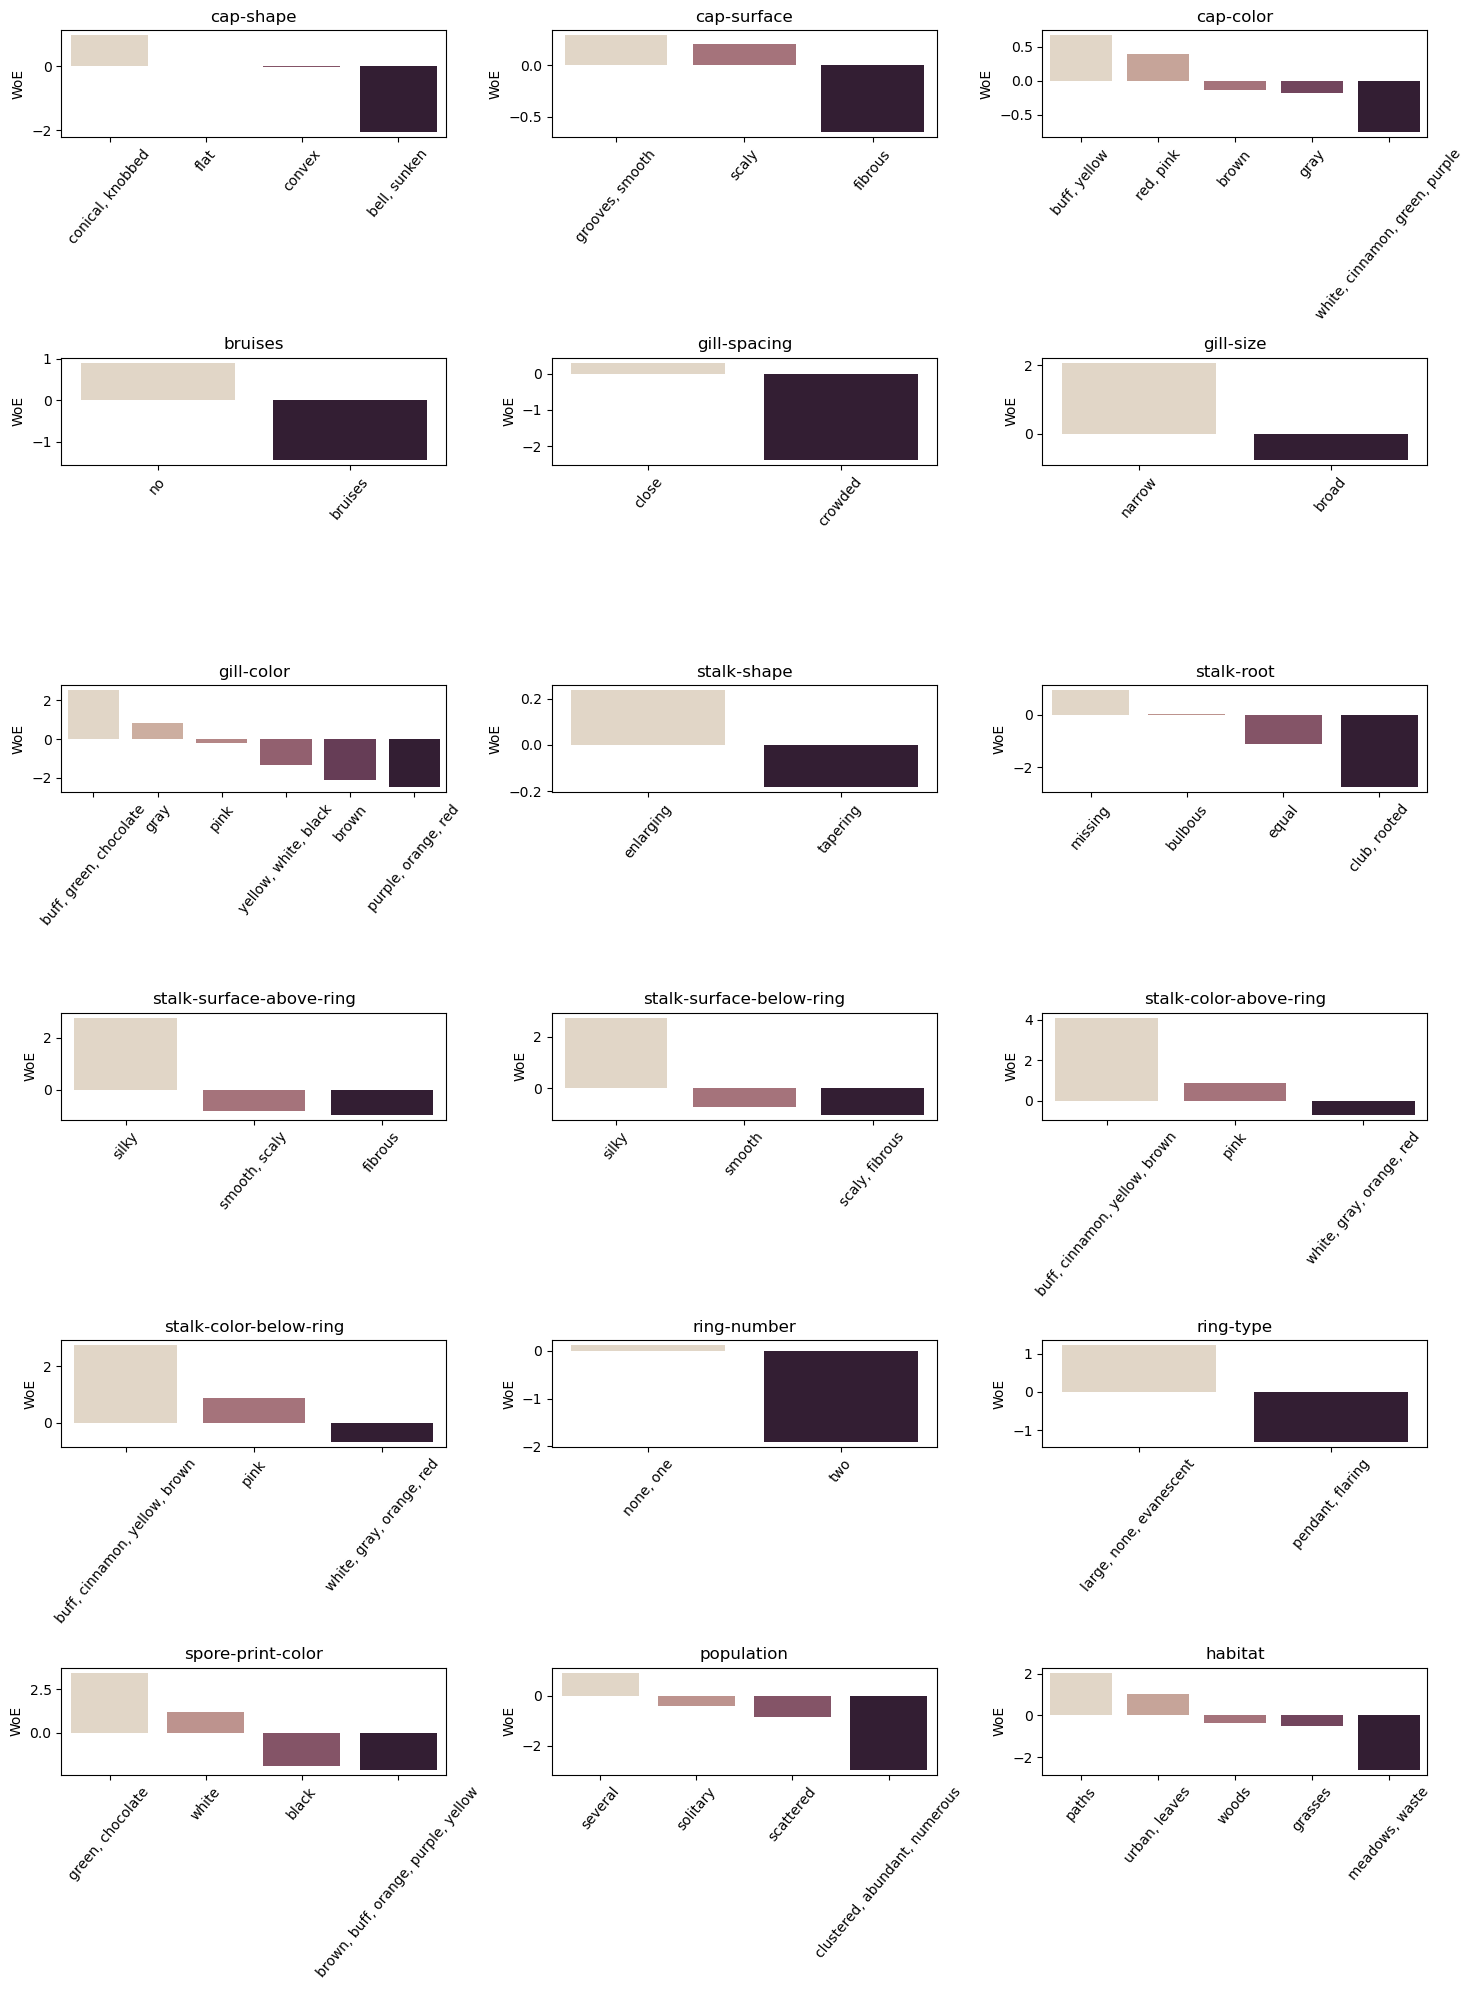

In [41]:
aux.woe_bins_plot(woe_bins, X_train_binned)

<i>Distinguishing which categories are implying edible mushrooms or poisonous mushrooms (based on WoE sign).<i>

In [42]:
aux.cats_indicators(X_train, woe_bins, 'edible')

,Features,Categories
0,cap-shape,"convex, bell, sunken"
1,cap-surface,fibrous
2,cap-color,"brown, gray, white, cinnamon, green, purple"
3,bruises,bruises
4,gill-spacing,crowded
5,gill-size,broad
6,gill-color,"pink, yellow, white, black, brown, purple, orange, red"
7,stalk-shape,tapering
8,stalk-root,"equal, club, rooted"
9,stalk-surface-above-ring,"smooth, scaly, fibrous"


In [43]:
aux.cats_indicators(X_train, woe_bins, 'poisonous')

,Features,Categories
0,cap-shape,"conical, knobbed, flat"
1,cap-surface,"grooves, smooth, scaly"
2,cap-color,"buff, yellow, red, pink"
3,bruises,no
4,odor,"creosote, fishy, foul, musty, pungent, spicy, none, almond, anise"
5,gill-attachment,"free, attached"
6,gill-spacing,close
7,gill-size,narrow
8,gill-color,"buff, green, chocolate, gray"
9,stalk-shape,enlarging


<h2><b>Bayesian Optimization + Feature Selection<b><h2>

<i>Defining a model space which will be used in the modelling phase.<i>
- We are going to use 4 models - Random Forest, Logistic Regression, Gradient Boosting and Decision Tree.

In [44]:
rf = aux.RandomForestClassifier(random_state = seed)
lr = aux.LogisticRegression(random_state = seed)
gbc = aux.GradientBoostingClassifier(random_state = seed)
dt = aux.DecisionTreeClassifier(random_state = seed)

models_dict = {'Random Forest Classifier': rf, 'Logistic Regression': lr,  'Gradient Boosting Classifier': gbc,'Decision Tree Classifier': dt}

<i>For each model, we will tune its hyperparameters based on Bayesian Optimization, which will then be used in the feature selection with Recursive Feature Elimination.
- Each model will be first optimized using Stratified 10-fold Cross Validation, and then will select a set of optimal features with RFE using Stratified 10-fold Cross Validation.
- Both optimization and feature selection will be conducted while maximizing an objective function - F1 score.
- Noted, each model will be optimized on the training set and the same applies for the feature selection as well.

Since we optimized and apply 4 models within feature selection, hence we get 4 different set of optimal features.

In [45]:
feat_select_df = aux.feat_selection(X_train_binned, y_train, models_dict, seed)

Starting Feature Selection with Random Forest Classifier ... 

Starting Bayesian Optimization of Random Forest Classifier ...
Bayesian Optimization of Random Forest Classifier finished  ...
Starting Recursive Feature Elimination with Random Forest Classifier ...
Recursive Feature Elimination with Random Forest Classifier finished ...
Execution time: 398 seconds
12 features selected: ['bruises', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'ring-type', 'spore-print-color', 'population', 'habitat'] 

------------------------------------------------------------------------------------------------------------------- 

Starting Feature Selection with Logistic Regression ... 

Starting Bayesian Optimization of Logistic Regression ...
Bayesian Optimization of Logistic Regression finished  ...
Starting Recursive Feature Elimination with Logistic Regression ...
Recursive Feature Elimination with Logistic Regressi

<i>As can be seen below, Random Forest has chosen 12 features, Logistic Regression has chosen 16 features, Gradient Boosting has chosen 17 features, and Decision Tree has chosen 18 features.
- On the each set of selected features, each model will be tuned in the next phase.

In [46]:
feat_select_df

,model_name,model,rfe_model,n_features,final_features,execution_time
0,Random Forest Classifier,"(DecisionTreeClassifier(criterion='entropy', max_depth=15, max_features=3,\n min_samples_leaf=5, random_state=820997625), DecisionTreeClassifier(criterion='entropy', max_depth=15, max_features=3,\n min_samples_leaf=5, random_state=298743079), DecisionTreeClassifier(criterion='entropy', max_depth=15, max_features=3,\n min_samples...","RFECV(cv=StratifiedKFold(n_splits=10, random_state=469, shuffle=True),\n estimator=RandomForestClassifier(criterion='entropy', max_depth=15,\n max_features=3, min_samples_leaf=5,\n n_estimators=1000, random_state=469),\n min_features_to_select=3, n_jobs=-1, scoring='f1')",12,"[bruises, gill-spacing, gill-size, gill-color, stalk-shape, stalk-root, stalk-surface-above-ring, stalk-surface-below-ring, ring-type, spore-print-color, population, habitat]",397.54000
1,Logistic Regression,"LogisticRegression(C=913.5889206036394, fit_intercept=False, random_state=469)","RFECV(cv=StratifiedKFold(n_splits=10, random_state=469, shuffle=True),\n estimator=LogisticRegression(C=913.5889206036394, fit_intercept=False,\n random_state=469),\n n_jobs=-1, scoring='f1')",16,"[cap-surface, cap-color, bruises, gill-spacing, gill-size, gill-color, stalk-shape, stalk-root, stalk-surface-above-ring, stalk-surface-below-ring, stalk-color-above-ring, stalk-color-below-ring, ring-number, ring-type, spore-print-color, population]",53.22042
2,Gradient Boosting Classifier,"([DecisionTreeRegressor(criterion='friedman_mse', max_depth=7, max_features=15,\n min_samples_leaf=5,\n random_state=RandomState(MT19937) at 0x1A099E48B40)], [DecisionTreeRegressor(criterion='friedman_mse', max_depth=7, max_features=15,\n min_samples_leaf=5,\n random_state=RandomState(MT19937) at 0x1A099E48B40)...","RFECV(cv=StratifiedKFold(n_splits=10, random_state=469, shuffle=True),\n estimator=GradientBoostingClassifier(learning_rate=0.001, max_depth=7,\n max_features=15, min_samples_leaf=5,\n n_estimators=1000,\n random_state=469),\n min_features_to_select=15, n_jobs...",17,"[cap-surface, cap-color, bruises, gill-spacing, gill-size, gill-color, stalk-shape, stalk-root, stalk-surface-above-ring, stalk-surface-below-ring, stalk-color-above-ring, stalk-color-below-ring, ring-number, ring-type, spore-print-color, population, habitat]",268.99795
3,Decision Tree Classifier,"DecisionTreeClassifier(criterion='entropy', max_depth=13, max_features=3,\n min_samples_leaf=5, random_state=469)","RFECV(cv=StratifiedKFold(n_splits=10, random_state=469, shuffle=True),\n estimator=DecisionTreeClassifier(criterion='entropy', max_depth=13,\n max_features=3, min_samples_leaf=5,\n random_state=469),\n min_features_to_select=3, n_jobs=-1, scoring='f1')",18,"[cap-shape, cap-surface, cap-color, bruises, gill-spacing, gill-size, gill-color, stalk-shape, stalk-root, stalk-surface-above-ring, stalk-surface-below-ring, stalk-color-above-ring, stalk-color-below-ring, ring-number, ring-type, spore-print-color, population, habitat]",67.58140


<h2><b>Bayesian Optimization + Final Model Selection<h2>

<i>For each model, its hyperparameters will be tuned on each set of optimal features which were selected using RFE.
- Each model will be optimized using Bayes Optimization with Stratified 10-fold Cross Validation.
- Each model will be optimized while maximizing objective function - F1 score.
- Each model will be tuned on the training set and then evaluated on the validation set.
- Since we use 4 models, hence we receive 4 sets of optimal features, therefore we get 16 tuned models, where each model (out of 4 models) will be tuned on each set of features.
- The model with the highest F1 score on validation set will be used as a final model.
- If there are more models having the best F1 score, other metrics will be used for the selection of the final model (such as accuracy, precision, recall, AUC, Gini, Kolmogorov Smirnov distance or Brier score loss).

In [47]:
hyp_tuning_df = aux.hyperparameter_tuning(X_train_binned ,y_train, X_valid_binned, y_valid, models_dict, feat_select_df, seed)

Starting Bayesian Optimization of Random Forest Classifier with 12 features selected by Random Forest Classifier ... 

Bayesian Optimization finished ...
Tuned hyperparameters of Random Forest Classifier: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 15, 'max_features': 4, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 5, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 299, 'n_jobs': None, 'oob_score': False, 'random_state': 469, 'verbose': 0, 'warm_start': False}
F1 Score on Validation set: 0.00013400960968097266
Execution time: 216 seconds
------------------------------------------------------------------------------------------------------------------- 

Starting Bayesian Optimization of Random Forest Classifier with 16 features selected by Logistic Regression ... 

Bayesian Optimization finished ...
Tuned hyperparameters of Random Forest Classifier: {'bootstra

<i>As can be seen below, the best performing model is Gradient Boosting which uses 12 features which has been selected by Random Forest within RFE. Thus, this is the final model which will be used in the final phase of modelling and evaluation.<i>
- Further, other non-linear models such as Random Forest or even Decision Tree has performed perfectly as well. On the other hand, a linear model, Logistic Regression, did worse compared to the non-linear ones, but still performed pretty well though.

In [48]:
hyp_tuning_df

,tuned_model_name,fs_model_name,fs_model,tuned_model,rfe_model,n_features,final_features,execution_time,F1,Precision,Recall,Accuracy,AUC,Gini,KS,Brier
0,Gradient Boosting Classifier,Random Forest Classifier,"(DecisionTreeClassifier(criterion='entropy', max_depth=15, max_features=3,\n min_samples_leaf=5, random_state=820997625), DecisionTreeClassifier(criterion='entropy', max_depth=15, max_features=3,\n min_samples_leaf=5, random_state=298743079), DecisionTreeClassifier(criterion='entropy', max_depth=15, max_features=3,\n min_samples...","([DecisionTreeRegressor(criterion='friedman_mse', max_depth=14, max_features=12,\n min_samples_leaf=5,\n random_state=RandomState(MT19937) at 0x1A098B28240)], [DecisionTreeRegressor(criterion='friedman_mse', max_depth=14, max_features=12,\n min_samples_leaf=5,\n random_state=RandomState(MT19937) at 0x1A098B2824...","RFECV(cv=StratifiedKFold(n_splits=10, random_state=469, shuffle=True),\n estimator=RandomForestClassifier(criterion='entropy', max_depth=15,\n max_features=3, min_samples_leaf=5,\n n_estimators=1000, random_state=469),\n min_features_to_select=3, n_jobs=-1, scoring='f1')",12,"[bruises, gill-spacing, gill-size, gill-color, stalk-shape, stalk-root, stalk-surface-above-ring, stalk-surface-below-ring, ring-type, spore-print-color, population, habitat]",440.49653,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.00000
1,Gradient Boosting Classifier,Gradient Boosting Classifier,"([DecisionTreeRegressor(criterion='friedman_mse', max_depth=7, max_features=15,\n min_samples_leaf=5,\n random_state=RandomState(MT19937) at 0x1A099E48B40)], [DecisionTreeRegressor(criterion='friedman_mse', max_depth=7, max_features=15,\n min_samples_leaf=5,\n random_state=RandomState(MT19937) at 0x1A099E48B40)...","([DecisionTreeRegressor(criterion='friedman_mse', max_depth=6, max_features=17,\n min_samples_leaf=5,\n random_state=RandomState(MT19937) at 0x1A09B711640)], [DecisionTreeRegressor(criterion='friedman_mse', max_depth=6, max_features=17,\n min_samples_leaf=5,\n random_state=RandomState(MT19937) at 0x1A09B711640)...","RFECV(cv=StratifiedKFold(n_splits=10, random_state=469, shuffle=True),\n estimator=GradientBoostingClassifier(learning_rate=0.001, max_depth=7,\n max_features=15, min_samples_leaf=5,\n n_estimators=1000,\n random_state=469),\n min_features_to_select=15, n_jobs...",17,"[cap-surface, cap-color, bruises, gill-spacing, gill-size, gill-color, stalk-shape, stalk-root, stalk-surface-above-ring, stalk-surface-below-ring, stalk-color-above-ring, stalk-color-below-ring, ring-number, ring-type, spore-print-color, population, habitat]",172.26087,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.00000
2,Gradient Boosting Classifier,Decision Tree Classifier,"DecisionTreeClassifier(criterion='entropy', max_depth=13, max_features=3,\n min_samples_leaf=5, random_state=469)","([DecisionTreeRegressor(criterion='friedman_mse', max_depth=6, max_features=18,\n min_samples_leaf=5,\n random_state=RandomState(MT19937) at 0x1A09B711740)], [DecisionTreeRegressor(criterion='friedman_mse', max_depth=6, max_features=18,\n min_samples_leaf=5,\n random_state=RandomState(MT19937) at 0x1A09B711740)...","RFECV(cv=StratifiedKFold(n_splits=10, random_state=469, shuffle=True),\n estimator=DecisionTreeClassifier(criterion='entropy', max_depth=13,\n max_features=3, min_samples_leaf=5,\n random_state=469),\n min_features_to_select=3, n_jobs=-1, scoring='f1')",18,"[cap-shape, cap-surface, cap-color, bruises, gill-spacing, gill-size, gill-color, stalk-shape, stalk-root, stalk-surface-above-ring, stalk-surface-below-ring, stalk-color-above-ring, stalk-color-below-ring, ring-number, ring-type, spore-print-color, population, habitat]",359.50053,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.00000
3,Decision Tree Classifier,Random Forest Classifier,"(DecisionTreeClassifier(criterion='entropy', max_depth=15, max_features=3,\n min_samples_leaf=5, random_state=820997625), DecisionTreeClassifier(criterion='entrop

In [49]:
print(f"The final model is {hyp_tuning_df.loc[0,'tuned_model_name']} with {hyp_tuning_df.loc[0,'n_features']} features which were selected by {hyp_tuning_df.loc[0,'fs_model_name']} within RFE.", '\n')

print(f"This final model has following selected features:", '\n', str(hyp_tuning_df.loc[0,'final_features']).replace("[", '').replace(']','').replace("'", ''), '\n')

print(f"This final model has following tuned hyperparameters:", '\n', hyp_tuning_df.loc[0,'tuned_model'].get_params(), '\n')

The final model is Gradient Boosting Classifier with 12 features which were selected by Random Forest Classifier within RFE. 

This final model has following selected features: 
 bruises, gill-spacing, gill-size, gill-color, stalk-shape, stalk-root, stalk-surface-above-ring, stalk-surface-below-ring, ring-type, spore-print-color, population, habitat 

This final model has following tuned hyperparameters: 
 {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 100.0, 'loss': 'deviance', 'max_depth': 14, 'max_features': 12, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 5, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1000, 'n_iter_no_change': None, 'random_state': 469, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False} 



<h2><b>Building a Final Model<h2>

<i>We fit the final model on the joined training and validation set.<i>

In [50]:
y_train_valid, X_train_valid_binned_filtered, X_test_binned_filtered = aux.data_filter_join(hyp_tuning_df, X_train_binned, X_valid_binned,
                                                                                                            X_test_binned, y_train, y_valid)

<i>Moreover, we export the data with the binned and WoE transformed values which includes only the final selected features within feature selection.

In [51]:
preprocessed = aux.prep_data_export([X_train_valid_binned_filtered, X_test_binned_filtered],
                                    [y_train_valid, y_test], ['Training_Validation', 'Test'],
                                    export = True, csvname = 'preprocessed')

<i>Fitting the final model on training and validation set.<i>

In [52]:
final_model = aux.final_model_fit(X_train_valid_binned_filtered, y_train_valid,
                                hyp_tuning_df, save_models = [True, True, True])

<i>Loading the final model, a feature selection model which forewent the final model (which was the input of RFE), and the RFE object which selected the final features using the feature selection model. <i>

In [53]:
feature_selection_model_loaded = aux.pickle.load(open('feature_selection_model.h5', 'rb'))
rfe_model_loaded = aux.pickle.load(open('rfe_model.h5', 'rb'))
final_model_loaded = aux.pickle.load(open('final_model.h5', 'rb'))

<i>Checking whether the final model is the same as the loaded one.<i>

In [54]:
assert (type(final_model) == type(final_model_loaded)) &\
    (final_model_loaded.get_params() == final_model.get_params())

<i>Checking whether the feature selection model is the same as the loaded one.<i>

In [55]:
assert (type(hyp_tuning_df.loc[0, 'fs_model']) == type(feature_selection_model_loaded)) &\
     (hyp_tuning_df.loc[0, 'fs_model'].get_params() == feature_selection_model_loaded.get_params())

<i>Checking whether the joined tranining + validation set filtered by RFE is the same as the joined training + validation set filtered by the loaded RFE.<i>

In [56]:
assert all(X_train_valid_binned_filtered == aux.pd.concat((aux.pd.DataFrame(rfe_model_loaded.transform(X_train_binned),
                                                            columns = X_train_binned.columns[rfe_model_loaded.support_],
                                                            index = X_train_binned.index),
                                                        aux.pd.DataFrame(rfe_model_loaded.transform(X_valid_binned),
                                                            columns = X_valid_binned.columns[rfe_model_loaded.support_],
                                                            index = X_valid_binned.index)))) & \
    all(X_test_binned_filtered == aux.pd.DataFrame(rfe_model_loaded.transform(X_test_binned),
                                                            columns = X_test_binned.columns[rfe_model_loaded.support_],
                                                            index = X_test_binned.index))

<h2><b>Evaluation<h2>

<i> The evaluation of the final model will be conducted on the test set which did not enter neither the feature selection nor final model selection.<i>

<i>As can be seen below in the confusion matrix, our model indeed classifies and distinguishes between the edibles and poisonous mushrooms perfectly.<i>

In [57]:
aux.conf_mat(y_test, final_model, X_test_binned_filtered)

,Predicted - Poisonous,Predicted - Edible
Actual - Poisonous,588,0
Actual - Edible,0,631


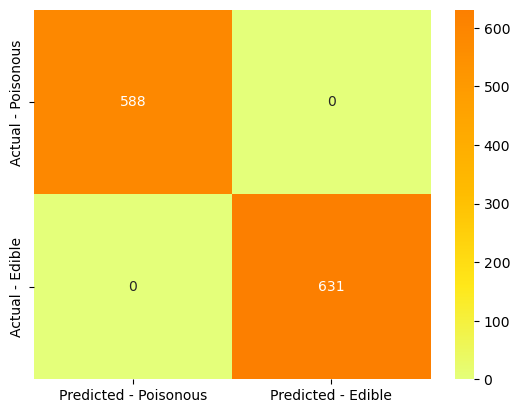

In [58]:
aux.sns.heatmap(aux.conf_mat(y_test, final_model, X_test_binned_filtered),
                annot = True, cmap ='Wistia', fmt = 'g')
aux.plt.show()

<i>Down below, we can observe other metrics which can be derived from the confusion matrix or from the predicted probabilities.<i>
- As expected, all the metrics seem to be idealistically perfect.

In [59]:
aux.evaluation_metrics(X_test_binned_filtered, y_test, final_model,
                        ['F1', 'Recall', 'Precision',
                        'AUC', 'Gini', 'KS', 'Brier'])

,Metric,Score
0,F1,1.00000
1,Recall,1.00000
2,Precision,1.00000
3,AUC,1.00000
4,Gini,1.00000
5,KS,1.00000
6,Brier,0.00000


<i>ROC Curve of the final model.
- As can be seen, the maximum of the ROC reaches the top left corner, thus there is no area above the curve which is in line with AUC being of 1.

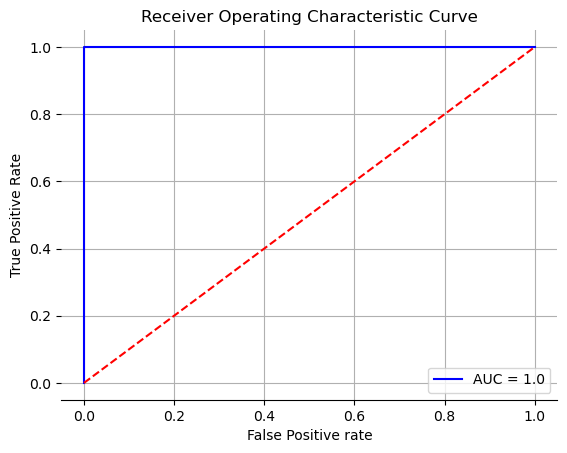

In [60]:
aux.ROC_curve_plot(y_test, X_test_binned_filtered, final_model)

<i>Learning curve of the final model.<i>
- We fit the learning curve on the joined training and validation set, with the 10-fold Stratified Cross Validation.
- As can be seen, the variance of the both training and test set F1 scores are minimal with increasing number of the training set size.
- With increasing number of the training size, both curves are converging towards F1 score of being 1.

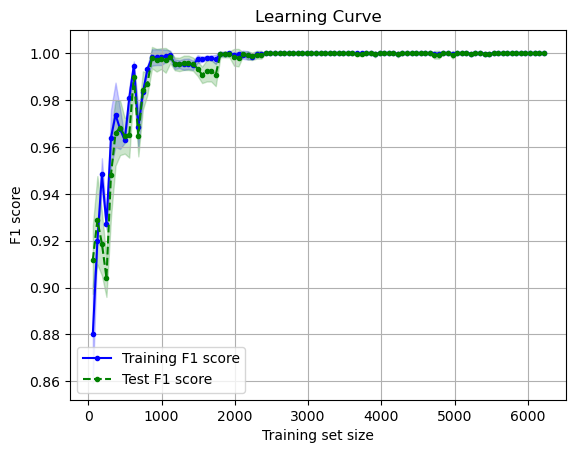

In [61]:
aux.learning_curve_plot(final_model, X_train_valid_binned_filtered, y_train_valid, seed)

<i>SHAP values per feature.<i>
- As previously defined, negative WoE should imply larger distribution of edibles. Thus, the lower value of the feature (more negative WoE's as red color), the higher predicted probability of mushroom being edible, conditional on given category of the feature.
- And vice versa, the positive WoE should imply larger distribution of poisonous. Thus, the higher value of the feature (more positive WoE's as blue color), the lower predicted probability of mushroom being edible, conditional on given category of the feature.

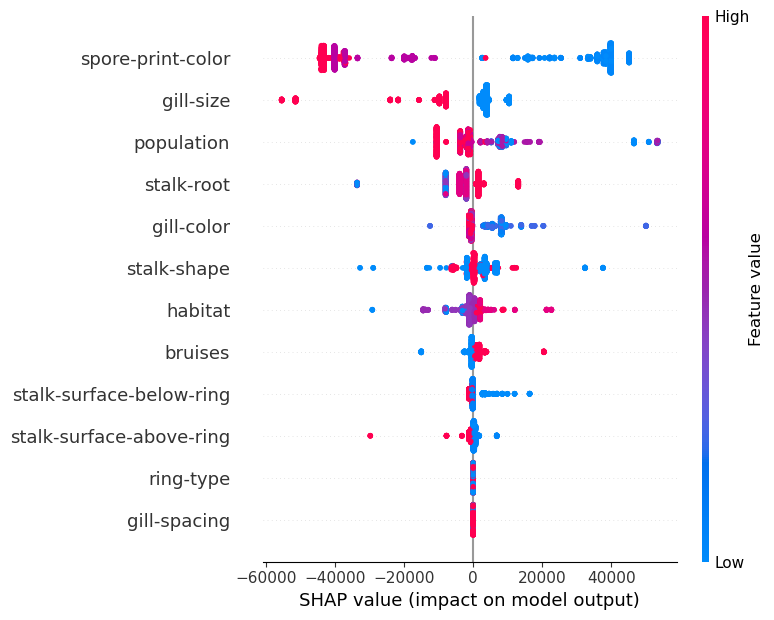

In [62]:
aux.shap_plots(X_test_binned_filtered, final_model)